# Imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from lifelines import CoxPHFitter

# Data load

In [5]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Preprocessing

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df = df[df['TotalCharges']!=' ']
df['TotalCharges'] = df['TotalCharges'].astype(float)

df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [10]:
df_model = df[['tenure', 'Churn', 'MonthlyCharges', 'TotalCharges', 'Contract']]
df_model = pd.get_dummies(df_model, drop_first=True)

In [11]:
df_model

,tenure,Churn,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year
0,1,0,29.85,29.85,False,False
1,34,0,56.95,1889.50,True,False
2,2,1,53.85,108.15,False,False
3,45,0,42.30,1840.75,True,False
4,2,1,70.70,151.65,False,False
...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,True,False
7039,72,0,103.20,7362.90,True,False
7040,11,0,29.60,346.45,False,False
7041,4,1,74.40,306.60,False,False


# Model

In [13]:
model = CoxPHFitter()
model.fit(df_model, duration_col='tenure', event_col='Churn')
model.print_summary()

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -12800.45
         time fit was run = 2025-08-04 10:51:52 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
MonthlyCharges     0.05      1.06      0.00            0.05            0.06                1.05                1.06
TotalCharges      -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
Contract_One year -1.74      0.18      0.10           -1.93           -1.55                0.15                0.21
Contract_Two year -4.54      0.01      0.19           -4.91           -4.18                0.01                0.02

                   cmp to      z      p  -log2(p)
covariate                                        
MonthlyCharges       0.00  36.00 <0.005    940.43
TotalCharges         0.00 -43.72 <0.005       inf
Contract_One year    0.00 -17.94 <0.005    236.75
Contract_Two year    0.00 -24.40 <0.005    434.23
---
Concordance = 0.92
Partial AIC = 25608.90
log-likelihood ratio test = 5705.17 on 4 df
-log2(p) of ll-ratio test = inf

In [16]:
df_model.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [31]:
df_model[:10]

,tenure,Churn,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year
0,1,0,29.85,29.85,False,False
1,34,0,56.95,1889.50,True,False
2,2,1,53.85,108.15,False,False
3,45,0,42.30,1840.75,True,False
4,2,1,70.70,151.65,False,False
5,8,1,99.65,820.50,False,False
6,22,0,89.10,1949.40,False,False
7,10,0,29.75,301.90,False,False
8,28,1,104.80,3046.05,False,False
9,62,0,56.15,3487.95,True,False


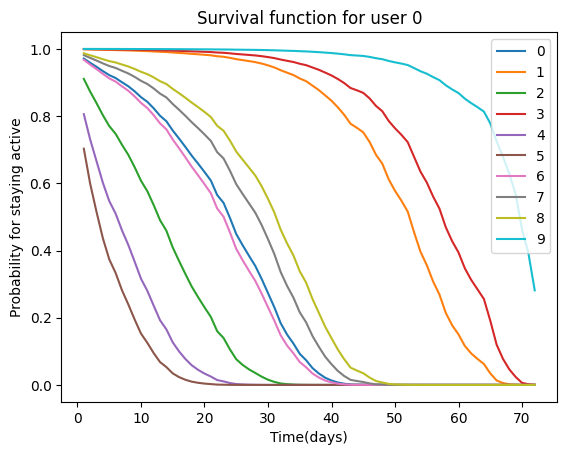

In [32]:
survival_function = model.predict_survival_function(df_model[:10])

survival_function.plot(title='Survival function for user 0')
plt.xlabel('Time(days)')
plt.ylabel('Probability for staying active')
plt.show()

In [ ]:
# Higher score = higher risk of churning sooner.
# Lower score = lower risk (longer survival).
# These are not bounded between 0 and 1.

model.predict_partial_hazard(df_model)

0        23.894376
1         0.924650
2        76.771040
3         0.454170
4       177.439710
           ...    
7038      3.524963
7039      0.001767
7040     14.210988
7041    169.041434
7042      0.000279
Length: 7032, dtype: float64